In [99]:
from qiskit import *
from qiskit.visualization import *
from qiskit.quantum_info.operators import Operator, Pauli
import numpy as np
import math

          ┌───┐┌─┐   
q79_0: |0>┤ H ├┤M├───
          ├───┤└╥┘┌─┐
q79_1: |0>┤ H ├─╫─┤M├
          └───┘ ║ └╥┘
 c79_0: 0 ══════╩══╬═
                   ║ 
 c79_1: 0 ═════════╩═
                     


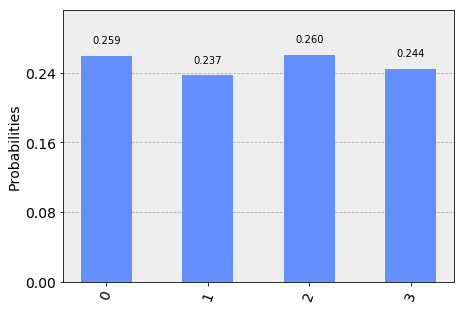

In [123]:
class DustCircuit(QuantumCircuit):
    def __init__(self, n_states, backend = BasicAer.get_backend('qasm_simulator')):
        n = math.ceil(math.log(n_states,2))
        self.q = QuantumRegister(n)
        self.c = ClassicalRegister(n)
        self.backend = backend
        self.dict_results = None
        super().__init__(self.q,self.c)    
    def execute(self, nshots = 1000):
        self.result = execute(self, self.backend, shots=nshots).result()
        self.counts = self.result.get_counts(self)
        self.dict_results = {}
        for key in list(self.counts.keys()):
            self.dict_results[int(key,2)] = self.counts[key]
        return self.result
    def execute_statevect(self):
        self.result = execute(self, BasicAer.get_backend('statevector_simulator')).result()
        self.statevector = self.result.get_statevector(self)
        return self.result
    def plot(self, how='histogram'):
        fig = None
        if (how == 'histogram'): fig = \
         plot_histogram(self.dict_results)
        elif (how == 'state_city'): fig = \
         plot_state_city(self.statevector)
        return fig
c = DustCircuit(3)
c.h(c.q)
c.measure(c.q, c.c)
print(c)
c.execute()
c.plot()

In [114]:
def matrizDensidad(tam, t, freq): #tam 4, estados 0 a 3
    h, kB = 6.582119624 * 10**(-16), 8.6173324*10**(-5) #ctes    
    E = [h*freq*(i+1/2) for i in range(tam)]
    #E = [-13.6, -9.37,-5.14,-0.9]
    
    cNumerador = [math.exp(-E[i]/(kB*t)) for i in range(tam)] 
    print(cNumerador)
    sumDenom = math.sqrt(sum(cNumerador))
    print(sumDenom)
    c = [math.sqrt(cNumerador[i])/sumDenom for i in range(tam)] 
    print(c)
    return np.matrix([[c[i]*c[j] for j in range(tam)] for i in range(tam)])
m = matrizDensidad(4, 15*10**8, 1.55*10**21)
m2 = m*m.T
XX = Operator(m)

[0.01932374564543737, 7.215624707039738e-06, 2.6943658268000265e-09, 1.0060954530444351e-12]
0.13903583698283092
[0.999813278994758, 0.019320137496225426, 0.0003733374228119375, 7.214277398340978e-06]
[[9.99626593e-01 1.93165300e-02 3.73267713e-04 7.21293034e-06]
 [1.93165300e-02 3.73267713e-04 7.21293034e-06 1.39380831e-07]
 [3.73267713e-04 7.21293034e-06 1.39380831e-07 2.69335973e-09]
 [7.21293034e-06 1.39380831e-07 2.69335973e-09 5.20457984e-11]]


In [102]:
c = DustCircuit(2)
c.append(XX, c.q)
c.measure(c.q, c.c)
print(c)
#c.execute()
#c.plot()

ExtensionError: 'Input matrix is not unitary.'